In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
water_data = pd.read_csv('water.csv', names = ['ID', 'Location','Town', 'Mort', 'Hardns'],skiprows=1).drop('ID',axis=1)
#удаляем лишний столбец с ID
water_data.head()

,Location,Town,Mort,Hardns
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


In [4]:
water_data.info() #в данных нет пропущенных значений

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Location  61 non-null     object
 1   Town      61 non-null     object
 2   Mort      61 non-null     int64 
 3   Hardns    61 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 2.0+ KB


In [5]:
water_data.describe()

,Mort,Hardns
count,61.000000,61.000000
mean,1524.147541,47.180328
std,187.668754,38.093966
min,1096.000000,5.000000
25%,1379.000000,14.000000
50%,1555.000000,39.000000
75%,1668.000000,75.000000
max,1987.000000,138.000000


<AxesSubplot:xlabel='Hardns', ylabel='Mort'>

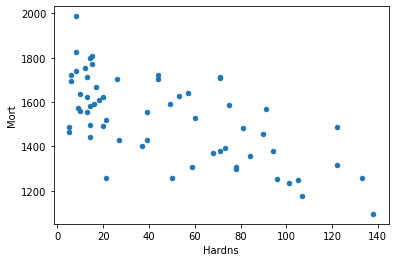

In [6]:
water_data.plot(x='Hardns', y='Mort', kind = 'scatter')

In [7]:
water_data[['Hardns', 'Mort']].corr() #Пирсон

,Hardns,Mort
Hardns,1.000000,-0.654849
Mort,-0.654849,1.000000


In [8]:
water_data[['Hardns', 'Mort']].corr(method='spearman')

,Hardns,Mort
Hardns,1.000000,-0.631665
Mort,-0.631665,1.000000


Между жёсткостью воды и смертностью есть обратная корреляция

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [10]:
X = water_data[['Hardns']]
y = water_data['Mort']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
y_pred = model.predict(X_test)
y_pred

array([1661.46872908, 1638.14122847, 1664.80122916, 1431.52622311,
       1638.14122847, 1628.14372821, 1238.24121809, 1661.46872908,
       1344.88122086, 1381.53872181])

In [14]:
model.score(X_test, y_test) # коэффициент детерминации

0.6368258436357874

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Mort', ylabel='Mort'>

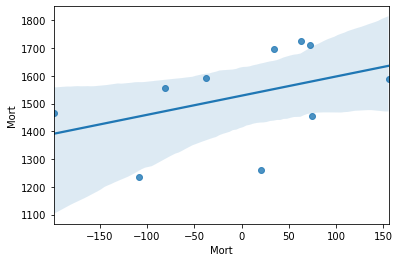

In [18]:
resudials = y_test-y_pred
sns.regplot(resudials, y_test) 

In [16]:
water_data_s = water_data.query('Location == "South"')
water_data_n = water_data.query('Location == "North"')

### Юг

In [19]:
water_data_s.head()

,Location,Town,Mort,Hardns
0,South,Bath,1247,105
2,South,Birmingham,1466,5
7,South,Bournemouth,1299,78
9,South,Brighton,1359,84
10,South,Bristol,1392,73


<AxesSubplot:xlabel='Hardns', ylabel='Mort'>

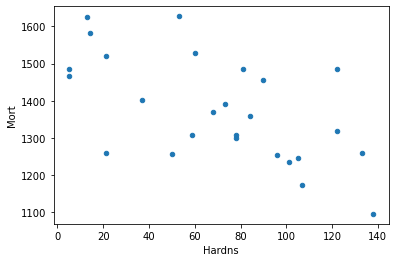

In [20]:
water_data_s.plot(x='Hardns', y='Mort', kind = 'scatter')

In [21]:
display(water_data_s[['Hardns', 'Mort']].corr()) #Пирсон
display(water_data_s[['Hardns', 'Mort']].corr(method='spearman'))

,Hardns,Mort
Hardns,1.000000,-0.602153
Mort,-0.602153,1.000000


,Hardns,Mort
Hardns,1.000000,-0.595723
Mort,-0.595723,1.000000


In [22]:
X = water_data_s[['Hardns']]
y = water_data_s['Mort']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([1324.08867366, 1399.90644348, 1343.94570861, 1354.77681858,
       1398.10125848, 1257.29682881])

0.4042268538320477


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Mort', ylabel='Mort'>

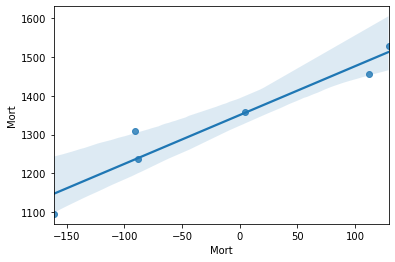

In [23]:
print(model.score(X_test, y_test)) # коэффициент детерминации
resudials = y_test-y_pred
sns.regplot(resudials, y_test)  #график остатков

### Север

<AxesSubplot:xlabel='Hardns', ylabel='Mort'>

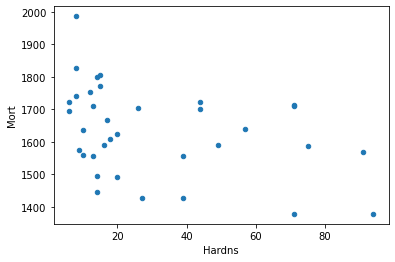

In [24]:
water_data_n.plot(x='Hardns', y='Mort', kind = 'scatter')

In [25]:
display(water_data_n[['Hardns', 'Mort']].corr()) #Пирсон
display(water_data_n[['Hardns', 'Mort']].corr(method='spearman')) 

,Hardns,Mort
Hardns,1.000000,-0.368598
Mort,-0.368598,1.000000


,Hardns,Mort
Hardns,1.000000,-0.404208
Mort,-0.404208,1.000000


Для северных населенных пунктов корелляция значительно слабее

In [26]:
X = water_data_n[['Hardns']]
y = water_data_n['Mort']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([1675.66935656, 1673.53564257, 1665.00078661, 1660.73335863,
       1682.07049852, 1682.07049852, 1686.3379265 , 1509.23966537,
       1686.3379265 ])

0.04215090774891839


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Mort', ylabel='Mort'>

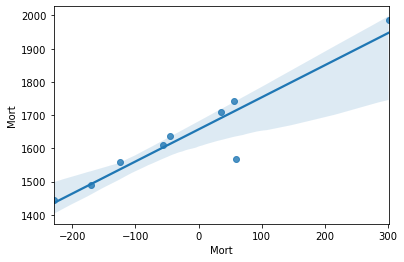

In [27]:
print(model.score(X_test, y_test)) # коэффициент детерминации
resudials = y_test-y_pred
sns.regplot(resudials, y_test) #график остатков

Модель не особенно эффективна, так как выборка данных очень маленькая, а корелляция низкая